Zonal statistics
================

Quite often you have a situtation when you want to summarize raster datasets based on vector geometries, such as calculating the average elevation of specific area.

[Rasterstats](https://github.com/perrygeo/python-rasterstats) is a Python module that does exactly that, easily.

- Let's start by reading the data:

In [1]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# File path
data_dir = "L5_data"
dem_fp = os.path.join(data_dir, "Helsinki_DEM2x2m_Mosaic.tif")

# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_fp)
dem

<open DatasetReader name='L5_data\Helsinki_DEM2x2m_Mosaic.tif' mode='r'>

Good, now our elevation data is in read mode.

Next, we want to calculate the elevation of two neighborhoods located in Helsinki, called `Kallio` and `Pihlajamäki`, and find out which one of them is higher based on the elevation data. We will use a package called [OSMnx](https://github.com/gboeing/osmnx) to fetch the data from OpenStreetMap for those areas.

- Specify place names for `Kallio` and `Pihlajamäki` that Nominatim can identify https://nominatim.openstreetmap.org/, and retrieve the 

In [2]:
# Keywords for Kallio and Helsinki in such format that they can be found from OSM
kallio_q = "Kallio, Helsinki, Finland"
pihlajamaki_q = "Pihlajamäki, Malmi, Helsinki, Finland"

# Retrieve the geometries of those areas using osmnx
kallio = ox.gdf_from_place(kallio_q)
pihlajamaki = ox.gdf_from_place(pihlajamaki_q)

# Reproject to same coordinate system as the 
kallio = kallio.to_crs(crs=dem.crs)
pihlajamaki = pihlajamaki.to_crs(crs=dem.crs)

type(kallio)

geopandas.geodataframe.GeoDataFrame

As we can see, now we have retrieved data from OSMnx and they are stored as GeoDataFrames.

- Let's see how our datasets look by plotting the DEM and the regions on top of it

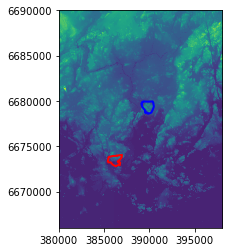

In [3]:
# Plot the Polygons on top of the DEM
ax = kallio.plot(facecolor='None', edgecolor='red', linewidth=2)
ax = pihlajamaki.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=2)

# Plot DEM
show((dem, 1), ax=ax)

**Which one is higher? Kallio or Pihlajamäki? We can use zonal statistics to find out!**

- First we need to get the values of the dem as numpy array and the affine of the raster

In [6]:
# Read the raster values
array = dem.read(1)

# Get the affine
affine = dem.transform

- Now we can calculate the zonal statistics by using the function `zonal_stats`.

In [9]:
# Calculate zonal statistics for Kallio
zs_kallio = zonal_stats(kallio, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for Pihlajamäki
zs_pihla = zonal_stats(pihlajamaki, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])


C:\ProgramData\Anaconda3\lib\site-packages\rasterstats\io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


Okey. So what do we have now?

In [10]:
print(zs_kallio)
print(zs_pihla)

[{'min': -2.1760001182556152, 'max': 37.388999938964844, 'mean': 12.759059456081534, 'median': 11.267999649047852, 'majority': 0.3490000069141388}]
[{'min': 8.73799991607666, 'max': 46.30400085449219, 'mean': 24.560033970865877, 'median': 24.17300033569336, 'majority': 10.41100025177002}]


Super! Now we can see that Pihlajamäki seems to be slightly higher compared to Kallio.